In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('/content/tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data = df.drop(['PassengerId','Name','Ticket',],axis=1)

In [9]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [10]:
num_data = df[['SibSp','Age','Parch','Fare']]
cat_data = df[['Survived','Pclass','Sex','Cabin','Embarked']]

In [11]:
print(f"Max value of the column is: {num_data['Age'].max()}")
print(f"Min value of the column is: {num_data['Age'].min()}")


Max value of the column is: 76.0
Min value of the column is: 0.17


In [12]:
bin = [0,5,17,25,50,80]
labels= ['Infant','Kid','Young','Adult','Old']
num_data['Age'] = pd.cut(num_data['Age'],bins= bin,labels=labels)

<ipython-input-12-a806d10b166c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Age'] = pd.cut(num_data['Age'],bins= bin,labels=labels)


In [13]:
pd.DataFrame(num_data['Age'].value_counts())

,Age
Adult,159
Young,101
Old,31
Kid,29
Infant,12


In [14]:
num_data['Age'].mode()[0]

'Adult'

In [15]:
pd.isna(num_data['Age']).sum()

86

In [16]:
data_1 = num_data.fillna({'Age':num_data['Age'].mode()[0]})

In [17]:
pd.isna(data_1['Age']).sum()

0

In [18]:
pd.isna(cat_data['Embarked']).sum()

0

This method takes out the only unique(non repeated data from a column)

In [19]:
cat_data['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

we will now use heatmap and correlation function to demonstrate how closely these data are related to each other. Value 1 is a strong relation while negative value means no strong relation.

<ipython-input-20-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

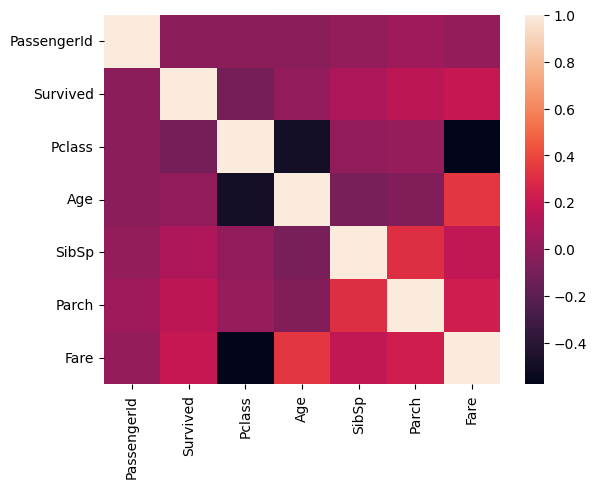

In [20]:
sns.heatmap(df.corr())

Lets take the mean value for survival according to the passenger class.

In [21]:
df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.467290
2,0.322581
3,0.330275


<Axes: xlabel='Pclass', ylabel='Survived'>

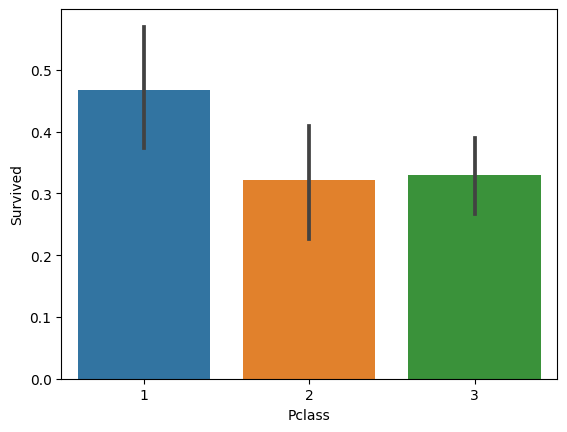

In [22]:
sns.barplot(x='Pclass',y='Survived',data=df)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [135]:
data_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,0,3,male,34.5,0,0,7.8292
1,893,1,3,female,47.0,1,0,7.0000
2,894,0,2,male,62.0,0,0,9.6875
3,895,0,3,male,27.0,0,0,8.6625
4,896,1,3,female,22.0,1,1,12.2875


In [146]:
data_2 = pd.get_dummies(data_1,columns=['Sex'],drop_first=True)
data_2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,0
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,1
4,896,1,3,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500,1
414,1306,1,1,39.0,0,0,108.9000,0
415,1307,0,3,38.5,0,0,7.2500,1
416,1308,0,3,NaN,0,0,8.0500,1


In [147]:
mean_age = data_2['Age'].mean()
data_2['Age'].fillna(mean_age,inplace = True)
mean_Fare = data_2['Fare'].mean()
data_2['Fare'].fillna(mean_Fare,inplace = True)

In [148]:
X = data_2.drop(['Survived'],axis=1)
y= data_2['Survived']

In [149]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [150]:
lg= LogisticRegression()

In [151]:
data_2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
dtype: int64

In [152]:
data_2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
dtype: int64

In [153]:
data_2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
dtype: int64

In [154]:
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
y_pred = lg.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [161]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix_result)



Accuracy: 1.0
Confusion Matrix:
[[53  0]
 [ 0 31]]


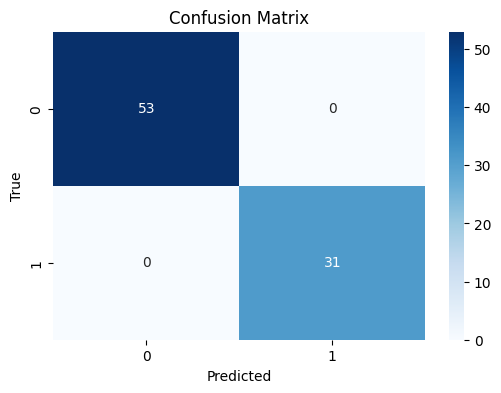

In [162]:
# Visualize confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
